In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Hubspot_sales_data_2022_2023_II.csv")
df.head()

,Date,Region,Customer platform,Product,Plan period,Revenue
0,2022-09-15,UCAN,Enterprise,Operations Hub,Yearly,8640.0
1,2023-10-08,EMEA,Professional,Operations Hub,Yearly,2400.0
2,2023-11-30,LATM,Enterprise,Sales Hub,Monthly,100.0
3,2023-10-20,EMEA,Enterprise,Operations Hub,Yearly,180.0
4,2022-12-27,UCAN,Enterprise,Operations Hub,Monthly,20.0


In [3]:
df.shape

(50000, 6)

<br>

# Data Cleaning 

Looking for any missing and duplicated values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               50000 non-null  object 
 1   Region             50000 non-null  object 
 2   Customer platform  50000 non-null  object 
 3   Product            50000 non-null  object 
 4   Plan period        50000 non-null  object 
 5   Revenue            50000 non-null  float64
dtypes: float64(1), object(5)
memory usage: 2.3+ MB


In [5]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool

In [6]:
df = df.drop_duplicates()

In [7]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 43590, dtype: bool

In [8]:
df.isna().sum()

Date                 0
Region               0
Customer platform    0
Product              0
Plan period          0
Revenue              0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43590 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               43590 non-null  object 
 1   Region             43590 non-null  object 
 2   Customer platform  43590 non-null  object 
 3   Product            43590 non-null  object 
 4   Plan period        43590 non-null  object 
 5   Revenue            43590 non-null  float64
dtypes: float64(1), object(5)
memory usage: 2.3+ MB


<br>

# Exploratory Data Analysis (EDA) 

Explore the Revenue data based on Customer Platform, Region, Product, and Plan Period.

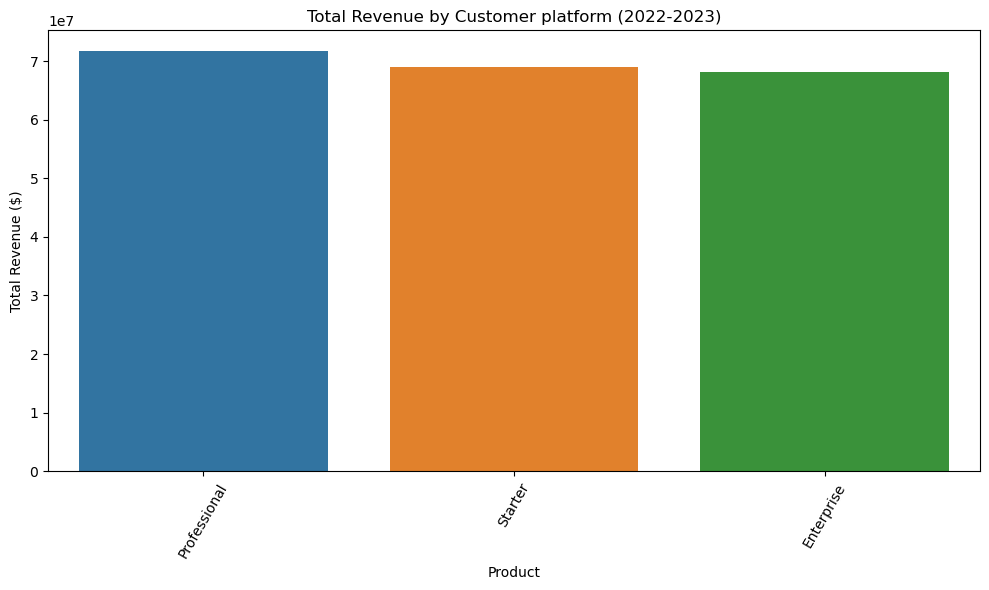

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer platform', y='Revenue', data=df.groupby('Customer platform')['Revenue'].sum().reset_index().sort_values('Revenue', ascending=False))

plt.title('Total Revenue by Customer platform (2022-2023)')
plt.xlabel('Product')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

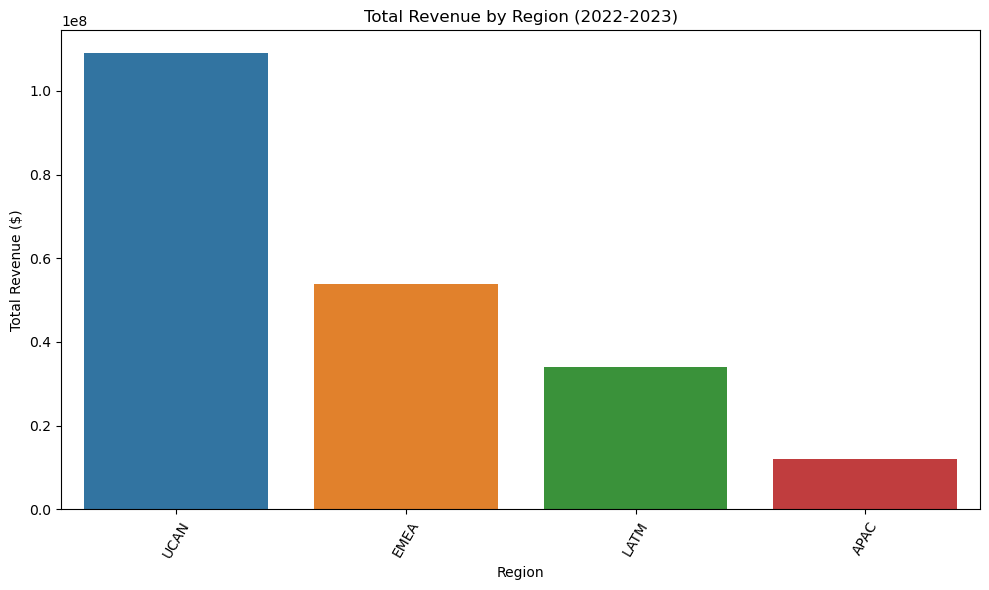

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Revenue', data=df.groupby('Region')['Revenue'].sum().reset_index().sort_values('Revenue', ascending=False))

plt.title('Total Revenue by Region (2022-2023)')
plt.xlabel('Region')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

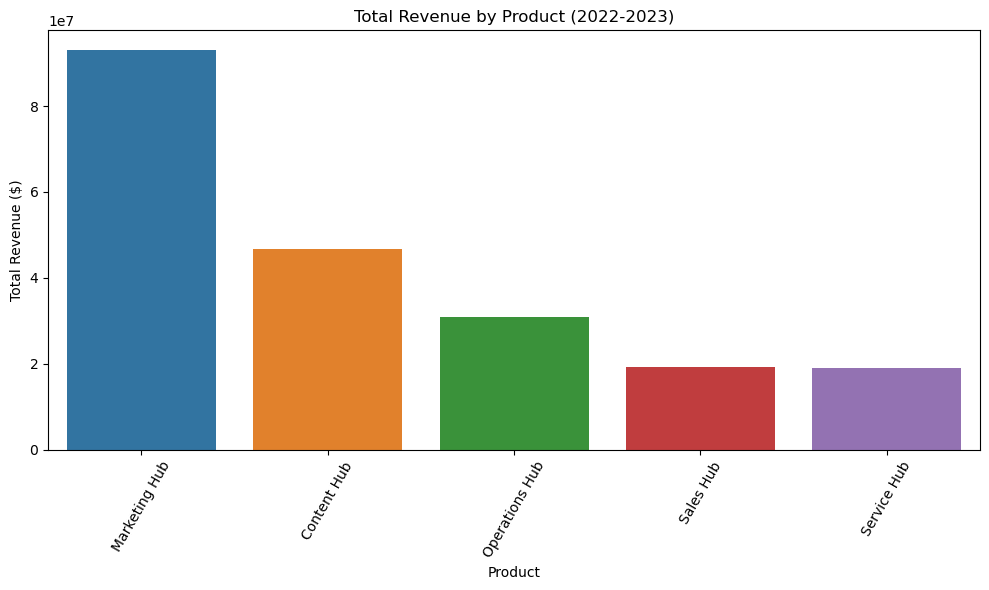

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Product', y='Revenue', data=df.groupby('Product')['Revenue'].sum().reset_index().sort_values('Revenue', ascending=False))

plt.title('Total Revenue by Product (2022-2023)')
plt.xlabel('Product')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

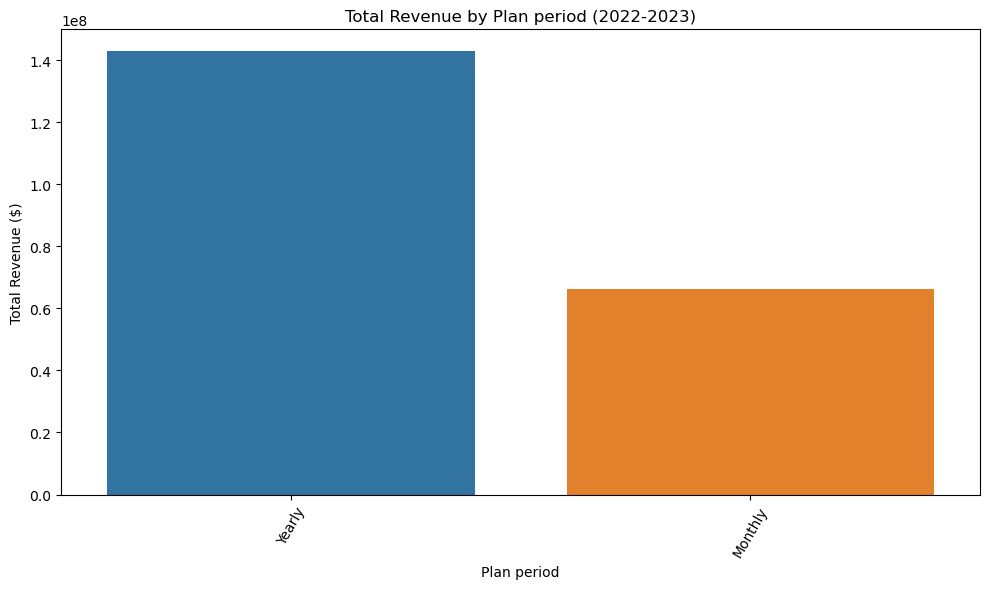

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Plan period', y='Revenue', data=df.groupby('Plan period')['Revenue'].sum().reset_index().sort_values('Revenue', ascending=False))

plt.title('Total Revenue by Plan period (2022-2023)')
plt.xlabel('Plan period')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

Based on the columns of the data, we can see the Revenue has a robust correlation between Revenue and the four dimensions—Product, Plan Period, Customer Platform, and Region.

- **Product (Plan Product)**: The type of product significantly influences Revenue, with certain products driving higher revenue figures. This suggests that optimizing or promoting these high-revenue products could lead to further financial growth.


- **Plan Period**: The duration of the plan (e.g., monthly, yearly) is strongly correlated with Revenue. Typically, longer plan periods (e.g., yearly plans) tend to generate more revenue due to their higher upfront costs and customer commitment.


- **Customer Platform (Plan Type)**: The platform through which customers access the service (Starter, Peofessional, Enterprise) plays a crucial role in revenue generation. Certain platforms may provide a more seamless user experience, leading to higher conversion rates and, consequently, more revenue.


- **Region (Plan Region)**: Geographical region significantly impacts Revenue, with some regions consistently outperforming others. This highlights the importance of tailoring marketing and sales strategies to regional preferences and economic conditions.

In [14]:
df.to_csv('Hubspot_sales_data_2022_2023_Final.csv', index=False)